In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('kaggle_fake_train.csv')

In [3]:
df.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [5]:
df.shape

(20800, 5)

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

Text(0,0.5,'Count')

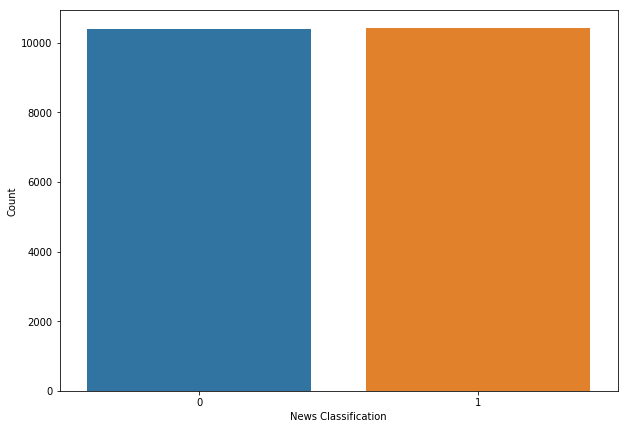

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

This shows that the data is not imbalanced.

# Data Cleaning and Preprocessing

In [12]:
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
# so we will bw dropping all the rows which are having missing values
df.dropna(inplace=True)
df.shape

(18285, 4)

In [24]:
news = df.copy()
news.reset_index(inplace=True)

In [23]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [25]:
corpus[0:20]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [28]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [30]:
cv1 = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X1 = cv1.fit_transform(corpus).toarray()

In [32]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# Extracting dependent variable from the dataset
y = news['label']

# Model Building

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Multinomial Naive Bayes

In [54]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [37]:
nb_pred = nb.predict(X_test)

In [39]:
score1 = accuracy_score(y_test, nb_pred)
score2 = precision_score(y_test, nb_pred)
score3 = recall_score(y_test, nb_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.17%
Precision score is: 0.87
Recall score is: 0.91


In [43]:
cm = confusion_matrix(y_test, nb_pred)
cm

array([[2768,  316],
       [ 223, 2179]], dtype=int64)

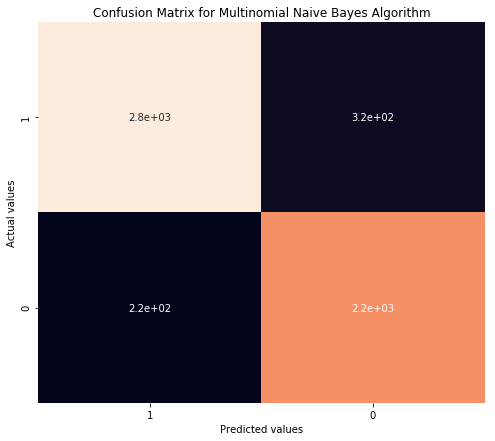

In [52]:
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, xticklabels=['1', '0'], yticklabels=['1', '0'],cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [53]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 90.3%
Accuracy score for alpha=0.2 is: 90.3%
Accuracy score for alpha=0.3 is: 90.27%
Accuracy score for alpha=0.4 is: 90.19%
Accuracy score for alpha=0.5 is: 90.25%
Accuracy score for alpha=0.6 is: 90.28%
Accuracy score for alpha=0.7 is: 90.36%
Accuracy score for alpha=0.8 is: 90.3%
Accuracy score for alpha=0.9 is: 90.32%
Accuracy score for alpha=1.0 is: 90.17%
--------------------------------------------
The best accuracy is 90.36% with alpha value as 0.7


# Logistic Regression

In [56]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [57]:
lr_pred = lr.predict(X_test)

In [58]:
score1 = accuracy_score(y_test, lr_pred)
score2 = precision_score(y_test, lr_pred)
score3 = recall_score(y_test, lr_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.42%
Precision score is: 0.89
Recall score is: 0.97


In [61]:
cm1 = confusion_matrix(y_test, lr_pred)
cm1

array([[2799,  285],
       [  76, 2326]], dtype=int64)

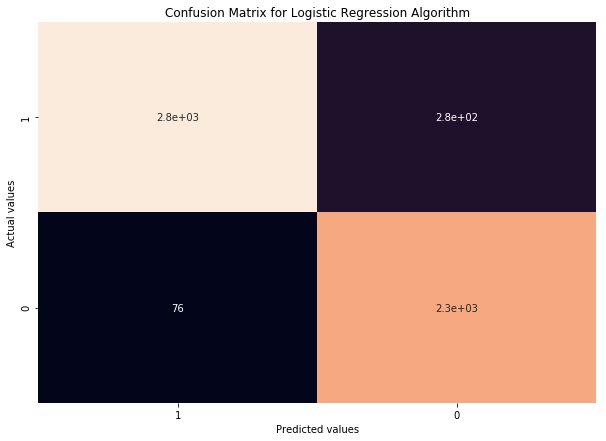

In [67]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True, xticklabels=['1', '0'], yticklabels=['1', '0'],cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [72]:
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.5,0.1):
    temp_classifier = LogisticRegression(C=i, random_state=0)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 91.89%
Accuracy score for C=0.2 is: 92.53%
Accuracy score for C=0.3 is: 92.98%
Accuracy score for C=0.4 is: 93.13%
Accuracy score for C=0.5 is: 93.33%
Accuracy score for C=0.6 is: 93.36%
Accuracy score for C=0.7 is: 93.36%
Accuracy score for C=0.8 is: 93.46%
Accuracy score for C=0.9 is: 93.4%
Accuracy score for C=1.0 is: 93.42%
Accuracy score for C=1.1 is: 93.44%
Accuracy score for C=1.2 is: 93.36%
Accuracy score for C=1.3 is: 93.31%
Accuracy score for C=1.4 is: 93.31%
--------------------------------------------
The best accuracy is 93.46% with C value as 0.8


If we compare NB with LR, LR gives much better aacuracy so we will go ahead a buid a classifier using LR

In [73]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

# Predictions

In [74]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [75]:
# Importing test dataset
df_test = pd.read_csv('kaggle_fake_test.csv')

In [76]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [78]:
news_title = df_test['title']

In [79]:
from random import randint

In [80]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Swedish men can’t contain their joy after putting a leash on a horse fly
Prediction: This is a FAKE news!


In [82]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Obama Jump Filed Me Regarding Illegal Pardons
Prediction: This is a FAKE news!


In [83]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Gold: End Of The Year Excitement” – Stewart Thomson
Prediction: This is a FAKE news!


In [84]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: In Michigan, Hillary Clinton Calls Donald Trump Enemy of ‘the Little Guy’ - The New York Times
Prediction: This is a REAL news.
